In [70]:
from matplotlib.pyplot import subplots
import numpy as np
import pandas as pd
from ISLP.models import ModelSpec as MS
from ISLP import load_data


In [71]:
from lifelines import \
     (KaplanMeierFitter,
      CoxPHFitter)
from lifelines.statistics import \
     (logrank_test,
      multivariate_logrank_test)
from ISLP.survival import sim_time


# Exercise 10

In [72]:
BrainCancer = load_data('BrainCancer')
BrainCancer.columns

Index(['sex', 'diagnosis', 'loc', 'ki', 'gtv', 'stereo', 'status', 'time'], dtype='object')

Float64Index([  0.0,  0.07,  1.18,  1.41,  1.54,  2.03,  3.38,  4.16,  4.56,
               5.15,  5.51,   6.1,  6.23,   6.3,  6.39,  6.82,  6.92,  7.05,
               7.18,  7.25,  8.98,  9.77,  10.1, 10.49, 10.82, 11.02, 11.48,
              11.51, 11.57,  13.9,  14.0, 14.56, 14.62, 14.75, 16.43, 16.92,
              17.57, 18.95, 19.41, 19.74,  19.9, 20.13, 20.69, 22.03, 23.67,
              24.39, 25.02, 26.46, 26.85,  29.7, 30.16, 31.15, 31.25, 31.67,
              32.82, 32.98, 33.41, 33.67, 34.26, 34.66, 35.93,  36.1, 39.25,
              39.54, 41.44, 42.07,  42.1, 44.39, 45.74, 46.16, 47.11,  47.8,
              49.05, 50.85, 51.02, 52.23, 52.75, 54.43,  55.8, 57.11, 57.25,
              57.64, 65.02, 67.38, 73.74, 78.75, 82.56],
             dtype='float64', name='timeline')

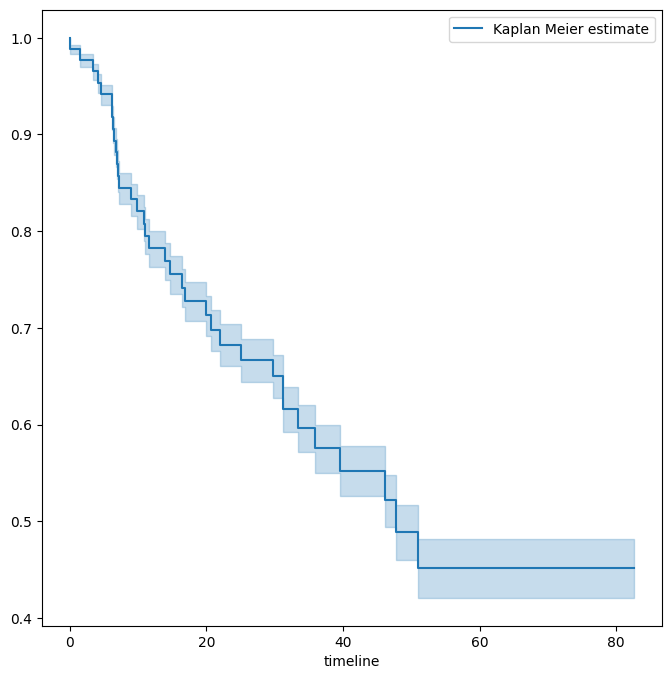

In [73]:
fig, ax = subplots(figsize=(8,8))
km = KaplanMeierFitter(alpha=0.682)
km_brain = km.fit(BrainCancer['time'], BrainCancer['status'])
km_brain_2 = km_brain
km_brain.plot(label='Kaplan Meier estimate', ax=ax)
dir(km_brain)
km_brain.survival_function_.index

In [74]:
import warnings
warnings.filterwarnings('ignore')
km_curves_df = pd.DataFrame()
arrays = []
index_arrays = []
for i in range(600):
    bootstrap = BrainCancer.sample(n=88, replace=True)
    km = KaplanMeierFitter()
    km_brain = km.fit(bootstrap['time'], bootstrap['status'])
    arrays.append(np.array([x[0] for x in km_brain.survival_function_.values]))
    index_arrays.append(km_brain.survival_function_.index)
    # km_curves_df[f'it_{i+1}'] = np.array([x[0] for x in km_brain.survival_function_.values])

max_len = 0
min_len = 300
for array, index_array in zip(arrays, index_arrays):
    if len(array) > max_len:
        max_len = len(array)
        i_arr = index_array
    if len(array) < min_len:
        min_len = len(array)

max_len, min_len, i_arr.shape
    

(64, 47, (64,))

In [75]:
import math


nmax_len = 0
nmin_len = 300
i = 0
for array in arrays:
    nan_to_add = max_len - len(array)
    # Create an array of NaN values
    nan_values = np.full(nan_to_add, math.nan)

    # Append the NaN values to the original array
    array = np.concatenate([array, nan_values])
    if len(array) > nmax_len:
        nmax_len = len(array)
    if len(array) < nmin_len:
        nmin_len = len(array)

    km_curves_df[f'it_{i+1}'] = array
    i += 1


nmax_len, nmin_len
km_curves_df = km_curves_df.copy()
km_curves_df

,it_1,it_2,it_3,it_4,it_5,it_6,it_7,it_8,it_9,it_10,...,it_591,it_592,it_593,it_594,it_595,it_596,it_597,it_598,it_599,it_600
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,0.988636,1.000000,1.000000,0.988636,0.977273,0.977273,0.988636,0.988636,0.988636,...,0.988636,0.988636,1.000000,0.977273,1.000000,1.000000,0.988636,1.000000,1.000000,0.988636
2,0.965517,0.977273,0.977011,0.965517,0.988636,0.977273,0.909091,0.988636,0.988636,0.988636,...,0.931818,0.988636,1.000000,0.977273,0.963855,0.988506,0.977273,0.976744,0.988372,0.988636
3,0.965517,0.977273,0.977011,0.965517,0.977141,0.977273,0.909091,0.988636,0.988636,0.965374,...,0.931818,0.988636,0.976744,0.965775,0.951807,0.965517,0.977273,0.976744,0.988372,0.977005
4,0.953597,0.965775,0.977011,0.965517,0.977141,0.977273,0.897583,0.988636,0.976867,0.965374,...,0.931818,0.965097,0.953488,0.965775,0.951807,0.965517,0.965775,0.976744,0.988372,0.977005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,NaN,0.512516,0.344824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,0.512516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='timeline'>

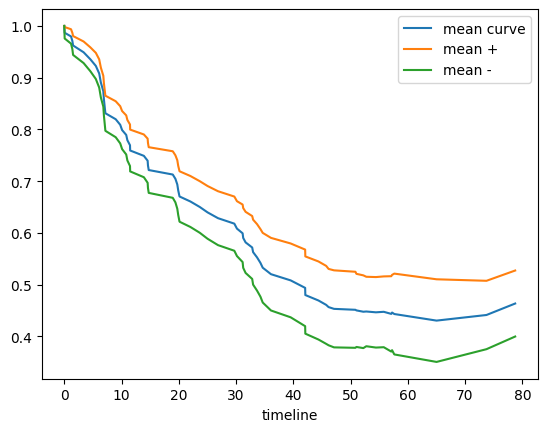

In [76]:
# Compute the mean of each row
mean_values_row = km_curves_df.mean(axis=1)

# Compute the standard deviation of each row
std_values_row = km_curves_df.std(axis=1)

import seaborn as sns

mean_plus_std = mean_values_row + std_values_row
mean_minus_std = mean_values_row - std_values_row
sns.lineplot(x=i_arr, y=mean_values_row, label = 'mean curve')
sns.lineplot(x=i_arr, y=mean_plus_std, label = 'mean +')
sns.lineplot(x=i_arr, y=mean_minus_std, label = 'mean -')

<Axes: xlabel='timeline'>

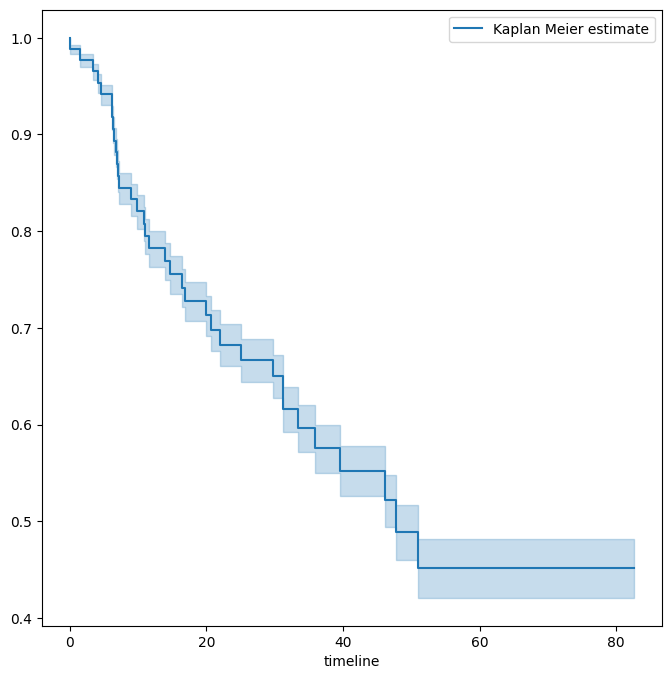

In [77]:
fig, ax = subplots(figsize=(8,8))
km_brain_2.plot(label='Kaplan Meier estimate', ax=ax)

In [78]:
BrainCancer[:5]

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [79]:
coxph = CoxPHFitter # shorthand

X = MS(BrainCancer.columns,
       intercept=False).fit_transform(BrainCancer)
fit_queuing = coxph().fit(
                  X,
                 'time',
                 'status')
fit_queuing.summary[['coef', 'se(coef)', 'p']]

,coef,se(coef),p
covariate,,,
sex[Male],0.097854,0.360701,0.786169
diagnosis[LG glioma],-1.091266,0.573943,0.057256
diagnosis[Meningioma],-2.082012,0.453688,0.000004
diagnosis[Other],-1.235849,0.625866,0.048311
loc[Supratentorial],0.375835,0.697787,0.590156
ki,-0.057920,0.018313,0.001563
gtv,0.036041,0.022623,0.111125
stereo[SRT],0.139636,0.598031,0.815379


In [80]:
BrainCancer.loc[BrainCancer['ki'] == 40, 'ki'] = 60
BrainCancer['ki'].value_counts()

80     36
90     27
70     14
60      6
100     5
Name: ki, dtype: int64

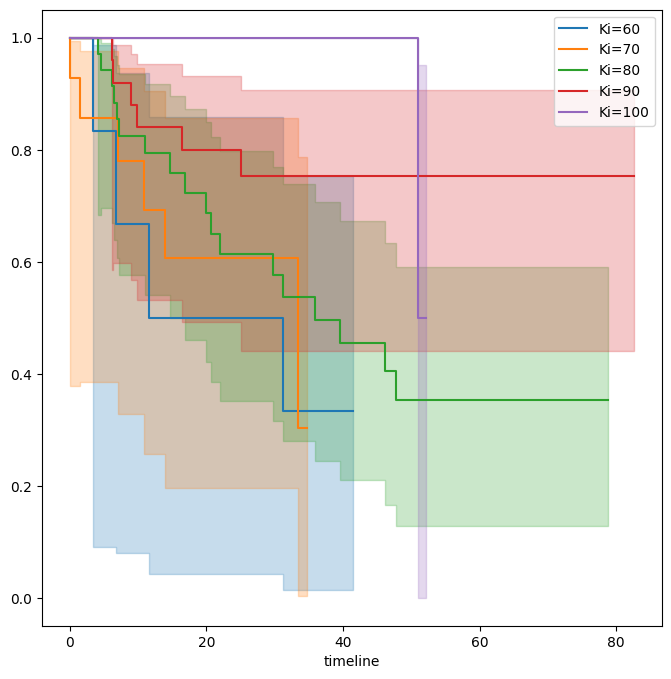

In [83]:
fig, ax = subplots(figsize=(8,8))
by_ki = {}
km = KaplanMeierFitter(alpha=0.01)
for ki, df in BrainCancer.groupby('ki'):
    by_ki[ki] = df
    km_ki = km.fit(df['time'], df['status'])
    km_ki.plot(label='Ki=%s' % ki, ax=ax)

# Exercise 11

In [92]:
df = pd.DataFrame()
df['x'] = np.array([0.1, 11, -0.3, 2.8, 1.8, 0.4])
df['time'] = np.array([26.5, 37.2, 57.3, 90.8, 20.2, 89.8])
df['status'] = np.array([1, 1, 1, 0, 0, 0])
df['group'] = 0
df.loc[df['x'] >= 2, 'group'] = 1
df
ex_df = df

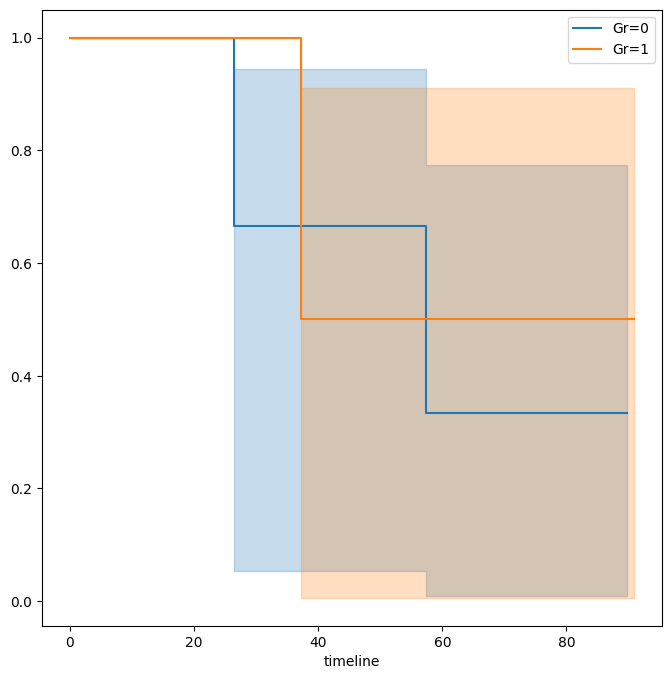

In [93]:
fig, ax = subplots(figsize=(8,8))
by_gr = {}
km = KaplanMeierFitter()
for gr, df in ex_df.groupby('group'):
    by_gr[gr] = df
    km_gr = km.fit(df['time'], df['status'])
    km_gr.plot(label='Gr=%s' % gr, ax=ax)

In [94]:
X = MS(['time',
        'status',
        'group'],
       intercept=False).fit_transform(ex_df)
F = coxph().fit(X, 'time', 'status')
F.log_likelihood_ratio_test()


<lifelines.StatisticalResult: log-likelihood ratio test>
null_distribution = chi squared
  degrees_freedom = 1
        test_name = log-likelihood ratio test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.36

In [108]:
logrank_test(by_gr[0]['time'],
             by_gr[1]['time'],
             by_gr[0]['status'],
             by_gr[1]['status'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.35

In [95]:
F.summary[['coef', 'se(coef)', 'p']]

,coef,se(coef),p
covariate,,,
group,-0.340143,1.235876,0.783144


In [105]:
math.exp(-0.3401)

0.7116991492890664

If you look at section 11.5.2 page 478 (book, or page 485 pdf) for answering ex 11 part b you see that this -0.3401 estimated coefficient (though there is not enough evidence to reject the null hypothesis) communicates that group B (1) would be at an instanteneous risk of = risk group A * exp(-0.3401) = risk group A * 0.71 = 30% lower risk

In [117]:
dir(F)[90:]
F.baseline_cumulative_hazard_

,baseline cumulative hazard
20.2,0.000000
26.5,0.201841
37.2,0.462642
57.3,0.791890
89.8,0.791890
90.8,0.791890
